#  PySOQCS Example 3: Simulation of a delay in the middle of a circuit.

Demonstration of the use of a delay as a circuit element.

## Description

<p style='text-align: justify;'> We consider a circuit made of two ideal balanced beamsplitters with two photons of exponential shape in each of the input channels as a theoretical representation of the two photons interference experiment reported in ref.[1]. We consider a delay dt in one of the channels between the two beamsplitters and we print the probability of these two photons to be measured at different times in the circuit output.  In this case we configure an ideal detector and circuit therefore the result only depends on the photon distinguishability. </p>
<br>
<br>
[1] Santori, C., Fattal, D., Vučković, J. et al. <i>Indistinguishable photons from a single-photon device.</i> <b> Nature 419, 594:597</b> (2002)

<div>
<img src="./assets/live3_device.png" width="500"/>
</div>
<p style='text-align: center;'> <b>Experiment device as described in fig. 3a of ref. [1] </b></p>

<div>
<img src="./assets/live3_circuit.png" width="700"/>
</div>
<p style='text-align: center;'> <b>Simulated circuit </b></p>

## Code

Import SOQCS and some extra libraries needed to print the results

In [1]:
import pysoqcs as soqcs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## SOQCS Circuit

<p style='text-align: justify;'> Function that contains the SOQCS calculation of the probability of two indistinguishable photons to arrive at different times to two detectors when a delay is introduced between two beamsplitters.<br>
<br>
<b>Note: </b> This is not the most
efficient implementation.  All the objects have to be recreated for each point calculation. This code is implemented for demostration purposes therefore it is intended to be simple. </p>

In [2]:
def Prob(tau):
    # Arm delay
    dt=3.0
    # Configure SOQCS
    soqcs.cfg_soqcs(2)
    
    # Create circuit
    example = soqcs.qocircuit(2,1,6,1,10000,False);
    # Create photons
    photons = soqcs.ph_bunch(example.num_levels(),1) 
    
    # Define phtons and measurement packets
    photons.add_photons(1,1, 0, 0.0, 1.0, 0.5,example)
    photons.add_photons(0,0, 0, tau, 1.0, 0.5,example)       
    photons.add_photons(1,0, 0,  dt, 1.0, 0.5,example)
   
    #Send the photons to the circuit
    photons.send2circuit('E',0,example);
    #Build the circuits
    example.beamsplitter(0,1,45.0,0.0);
    example.delay(1,dt+0.001); 
    example.beamsplitter(0,1,45.0,0.0);
    example.detector(0);
    example.detector(1);

    # Create a simulator and run the simulation
    sim=soqcs.simulator(0,1000)
    measured=sim.run(photons,example)
    
    # Return the probability
    term=[[0,1],
          [0,0],
          [1,0],
          [1,1]]

    prob=measured.prob_def(term,example)    
    return prob

## Main program: Plotter

This is the main program where we plot the probability as function of delay time dt. We create an array with all the delay times dt and all the probabilities corresponding with those delays. Then the result is plotted.


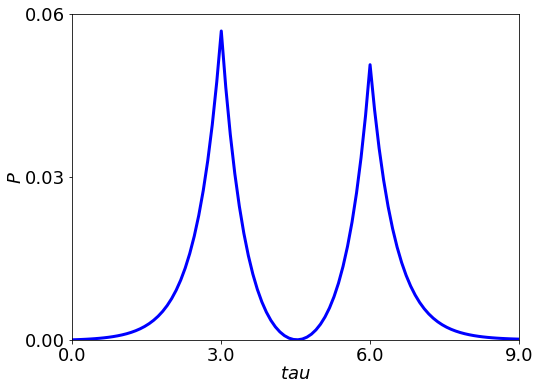

In [3]:
# Sweep program parameters
taum=9    
tau = np.linspace(0.001, taum, 100)
vProb=np.vectorize(Prob)
probs=vProb(tau)

# Print on screen
plt.rcParams["figure.figsize"] = (8,6)
plt.xlim(0,taum)
plt.ylim(0,0.06)
plt.xticks((0,3,6,9), ('0.0','3.0','6.0','9.0'), size = 18)
plt.yticks((0,0.03,0.06), ('0.00', '0.03','0.06'), size = 18)
plt.xlabel('$tau$', fontsize=18, labelpad=0)
plt.ylabel('$P$',  fontsize=18, labelpad=0)
plt.plot(tau, probs,color="b", linewidth=3.0)

<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2022 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>